In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from google.colab.patches import cv2_imshow


In [2]:
os.chdir('/content/drive/MyDrive/computer_vision_class/week7')

In [3]:
# Loading image
image = cv2.imread('photo_2023-06-21_22-32-42.jpg')
# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
# Convert to float type only for supporting cv2.kmean
pixel_vals = np.float32(pixel_vals)

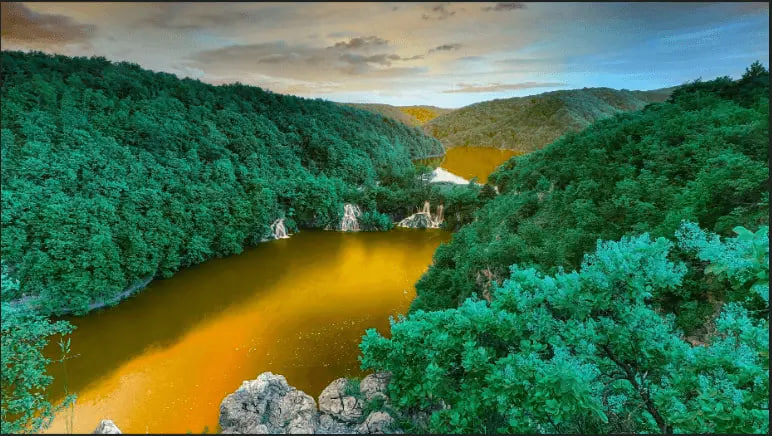

In [4]:
cv2_imshow(image)

# cv.kmeans()

**Input parameters**


**samples** : It should be of np.float32 data type, and each feature should be put in a single column.

**nclusters(K)** : Number of clusters required at end
**criteria** : It is the iteration termination criteria. When this criteria is satisfied, algorithm iteration stops. Actually, it should be a tuple of 3 parameters. They are `( type, max_iter, epsilon )`:

a.type of termination criteria. It has 3 flags as below:

**cv.TERM_CRITERIA_EPS** - stop the algorithm iteration if specified accuracy, epsilon, is reached.

**cv.TERM_CRITERIA_MAX_ITER** - stop the algorithm after the specified number of iterations, max_iter.

**cv.TERM_CRITERIA_EPS** + cv.TERM_CRITERIA_MAX_ITER - stop the iteration when any of the above condition is met.

b.max_iter - An integer specifying maximum number of iterations.

c.epsilon - Required accuracy

**attempts** : Flag to specify the number of times the algorithm is executed using different initial labellings. The algorithm returns the labels that yield the best compactness. This compactness is returned as output.

**flags** : This flag is used to specify how initial centers are taken. Normally two flags are used for this : cv.KMEANS_PP_CENTERS and cv.KMEANS_RANDOM_CENTERS.

**Output parameters**
**compactness** : It is the sum of squared distance from each point to their corresponding centers.

**labels** : This is the label array (same as 'code' in previous article) where each element marked '0', '1'.....

**centers** : This is array of centers of clusters.

Now we will see how to apply K-Means algorithm with three examples.

##2 cluster

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) #criteria
k = 2 # Choosing number of cluster
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)


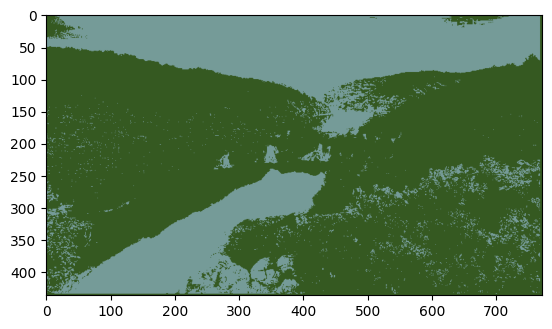

In [ ]:
centers = np.uint8(centers) # convert data into 8-bit values
segmented_data = centers[labels.flatten()] # Mapping labels to center points( RGB Value)
segmented_image = segmented_data.reshape((image.shape)) # reshape data into the original image dimensions
plt.imshow(segmented_image)

## 5 cluster

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85) #criteria
k = 5 # Choosing number of cluster
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)


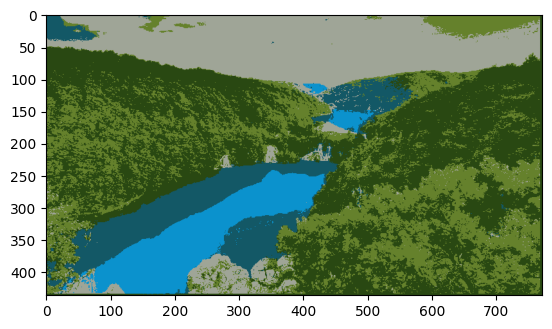

In [ ]:
centers = np.uint8(centers) # convert data into 8-bit values
segmented_data = centers[labels.flatten()] # Mapping labels to center points( RGB Value)
segmented_image = segmented_data.reshape((image.shape)) # reshape data into the original image dimensions
plt.imshow(segmented_image)

#Image Segmentation with Watershed Algorithm

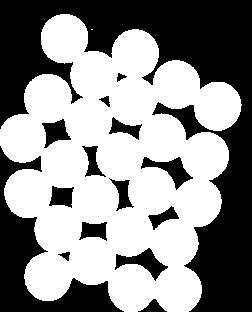

In [ ]:
img = cv2.imread('water_coins.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
cv2_imshow(thresh)

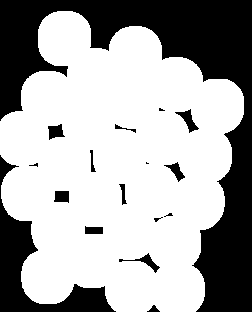

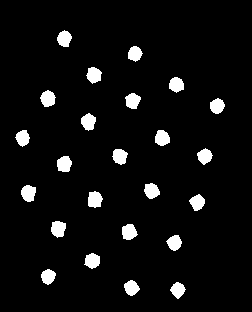

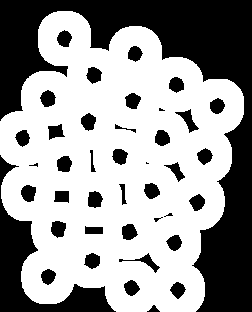

In [ ]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
cv2_imshow(sure_bg)
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
cv2_imshow(sure_fg)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
cv2_imshow(unknown)

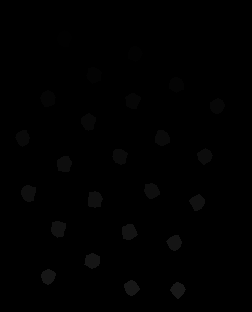

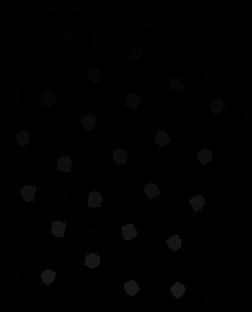

In [ ]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
cv2_imshow(markers)

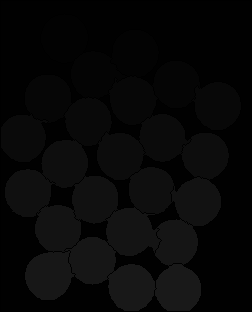

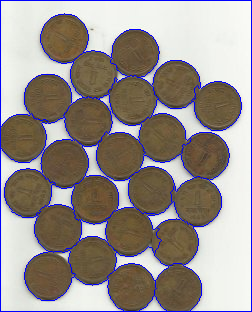

In [ ]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
cv2_imshow(markers)
cv2_imshow(img)

#connected_components

We intend to find the connected components (i.e. groups of
connected pixels) in the following image (img1.bmp). The
image is binary-valued: the pixel intensity levels are either 0
or 255.


n=9
[  0 255]
[0 1 2 3 4 5 6 7 8]


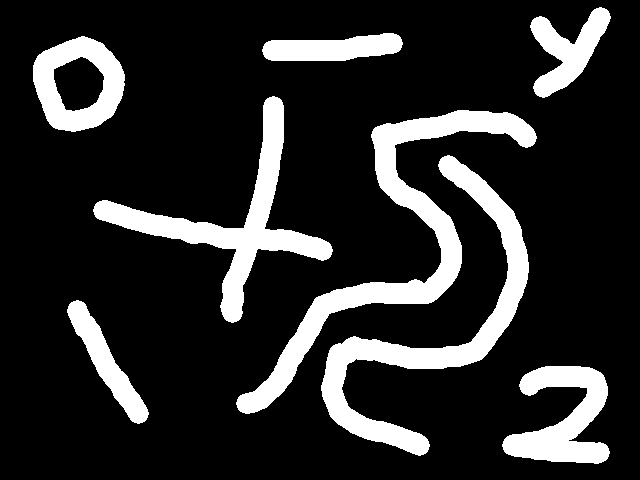

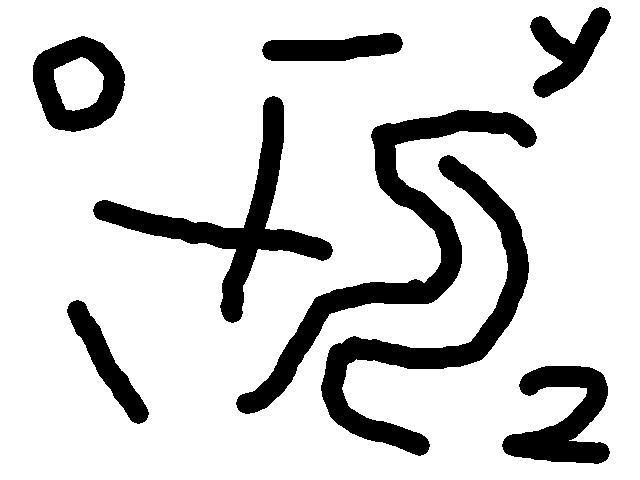

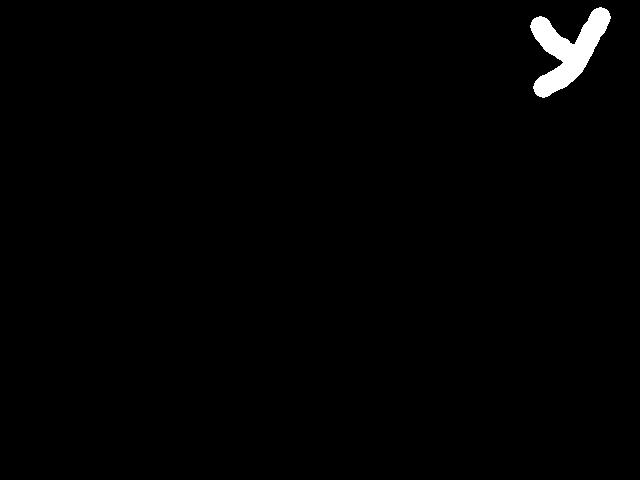

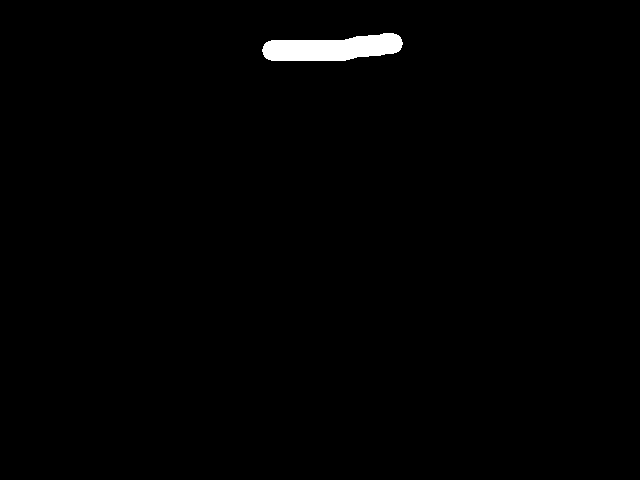

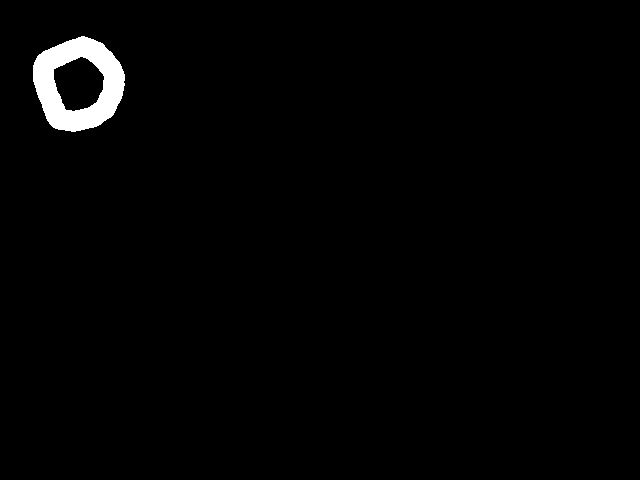

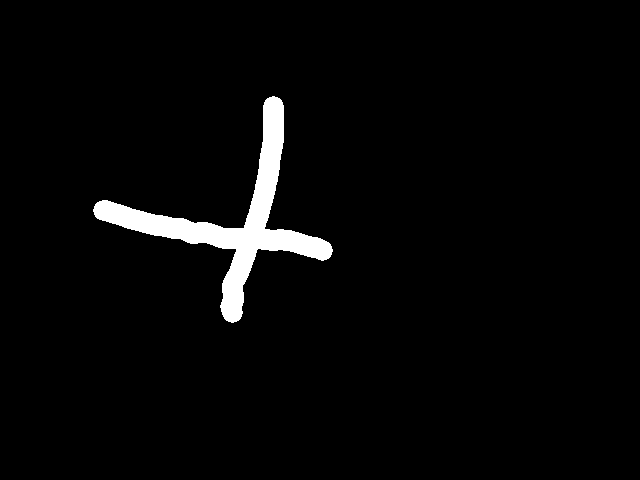

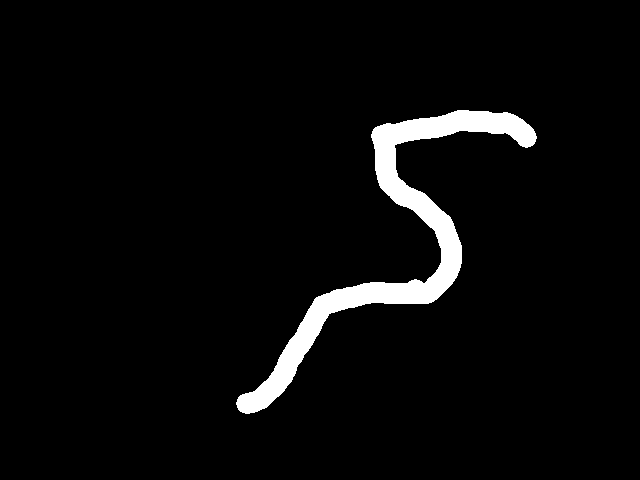

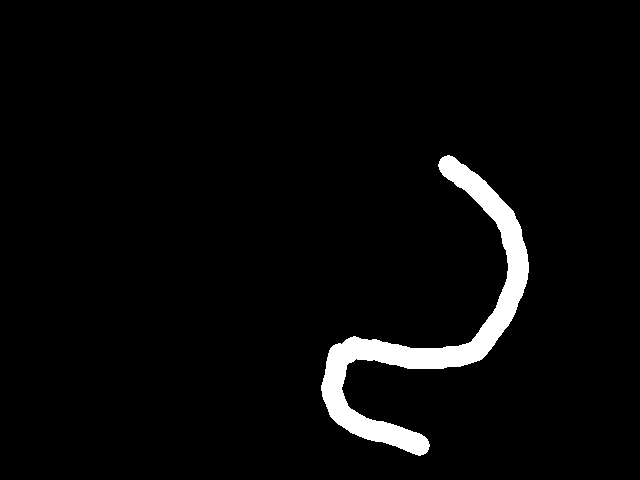

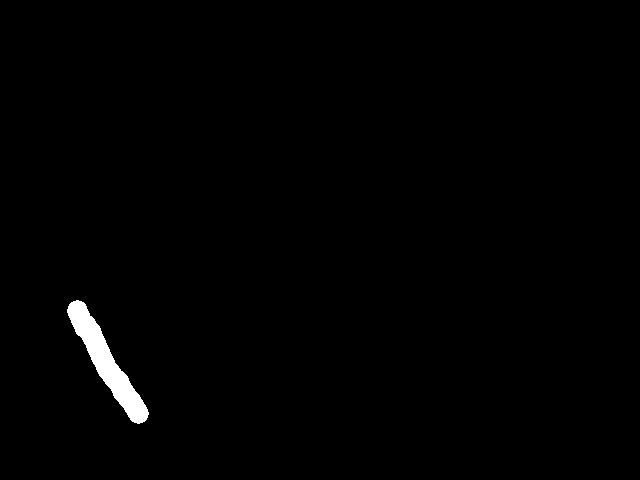

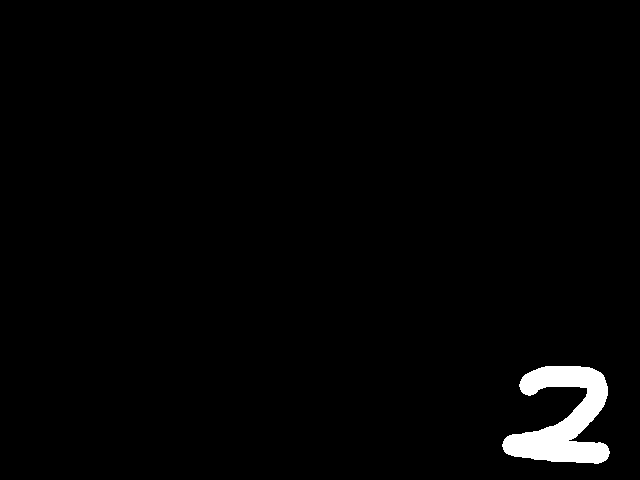

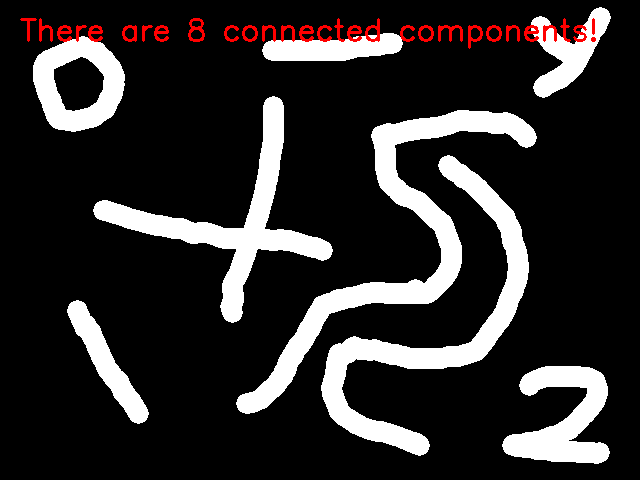

In [ ]:
import numpy as np
import cv2

I = cv2.imread('img1.bmp', cv2.IMREAD_GRAYSCALE)

n,C = cv2.connectedComponents(I);

print("n=%d"%n)
print(np.unique(I))
print(np.unique(C))

cv2_imshow( I)
cv2.waitKey(0) # press any key to continue...

for k in range(n):

    # show the k-th connected component
    Ck = np.zeros(I.shape, dtype=I.dtype)
    Ck[C == k] = 255;

    cv2_imshow( Ck)


I = cv2.cvtColor(I,cv2.COLOR_GRAY2BGR)

font = cv2.FONT_HERSHEY_SIMPLEX

# note: background is also counted as a connected component by openCV
cv2.putText(I,'There are %d connected components!'%(n-1),(20,40), font, 1,(0,0,255),2)

cv2_imshow(  I)



#Bean Counting!


We want to count the number of beans in the
following image. I have written a code which
transforms the image to grayscale and then
thresholds the image, setting the pixel intensities
above 127 to 255 and the others to 0. It then
counts the connected components of the
thresholded image. But the code does not work as
intended. Your job as a bean counter is to fix the
bugs and count the number of beans in the image.
By the way, there are 48 beans! :)


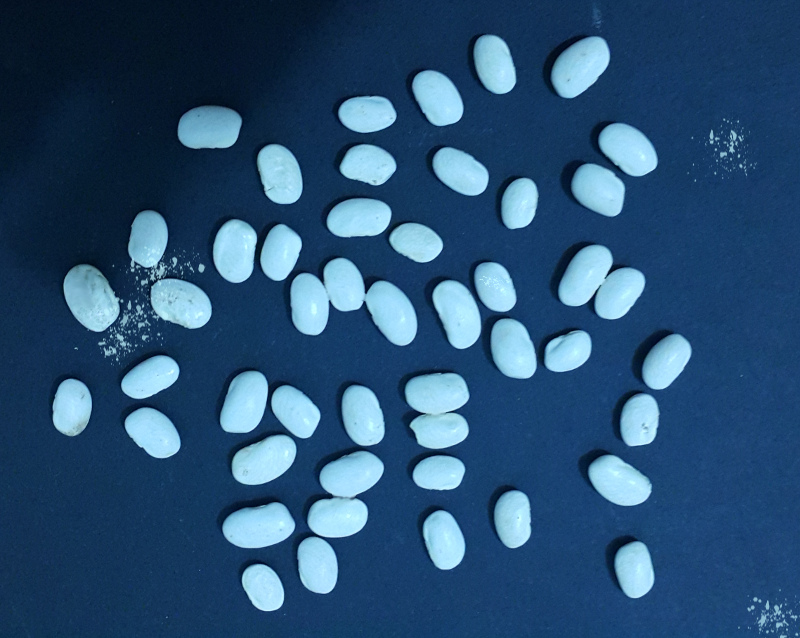

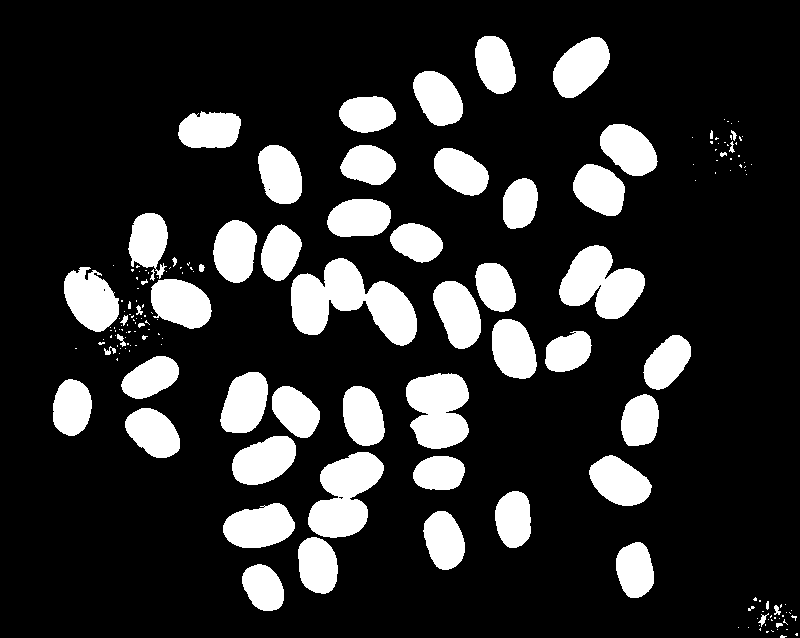

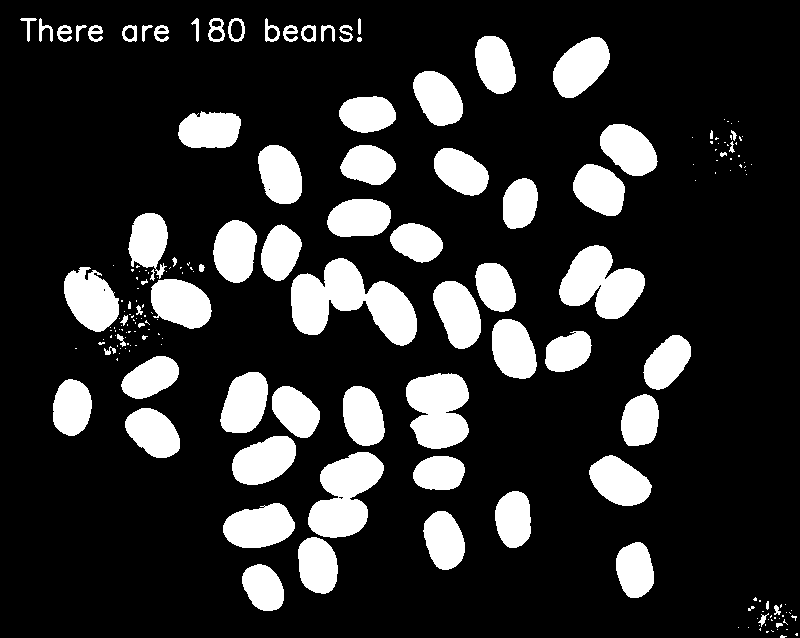

In [5]:
import numpy as np
import cv2

I = cv2.imread('beans.jpg')
cv2_imshow(I)
G = cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)

ret, T = cv2.threshold(G,127,255,cv2.THRESH_BINARY)

cv2_imshow( T)
# cv2.waitKey(0) # press any key to continue...

## erosion
# kernel = np.ones((5,5),np.uint8)
# T = cv2.erode(T,kernel)
# cv2.imshow('After Erosion', T)
# cv2.waitKey(0) # press any key to continue...

n,C = cv2.connectedComponents(T);

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(T,'There are %d beans!'%(n-1),(20,40), font, 1, 255,2)
cv2_imshow( T)
# cv2.waitKey(0)



#task in class : Simple Background Subtraction

Consider the following pair of images. In the second image, few toys have been
placed in the scene.


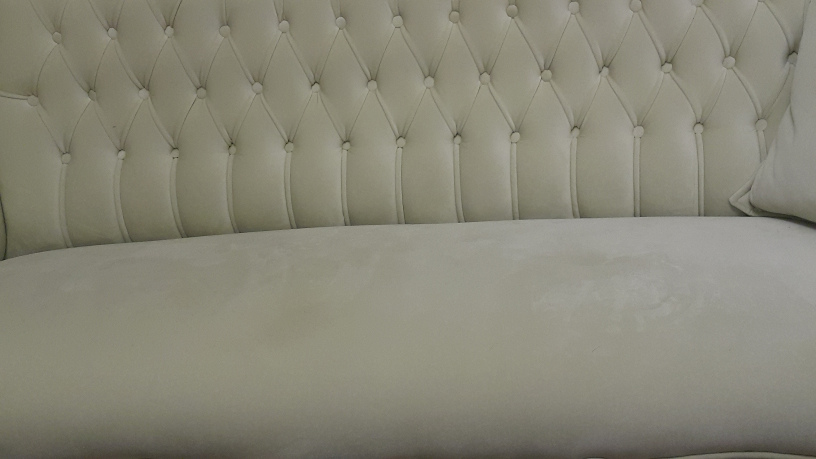

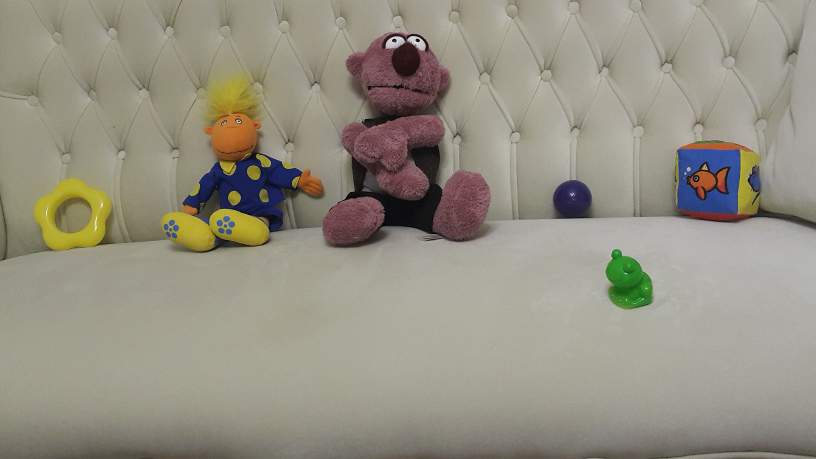

In [ ]:
img1= cv2.imread('scene1.jpg')
img2= cv2.imread('scene2.jpg')
cv2_imshow(img1)
cv2_imshow(img2)

The following code tries to count the number of toys by subtracting the two images,
thresholding the result and then counting the connected components. Your job is to
fix this code to get the correct number of toys and find the biggest toy.

Change the threshold variable and see the result. Find a reasonable threshold
(it does not need to give the correct result.)


● Uncomment the four lines after the line ## opening. Run the code. What does
the opening operator do? Change the kernel size and see the results.


● Uncomment the four lines after the line ## closing. Run the code. What does
the closing operator do?


● Tune the threshold, opening kernel size and closing kernel size until you get
the desired result, finding all the toys and their number.


● Uncomment all the lines after ## connected components with statistics. It
gives statistics about each connected component including centroid, left-most
pixel location, top-most pixel location, width, height and area (number of
pixels) of each connected component. We want to detect Jenab Khan (the
biggest toy) in the image and paint it in red. Currently, the code paints the last
connected component (j=n-1). Use the statistics to find the connected
component with the largest area, and paint the biggest toy in red

#response

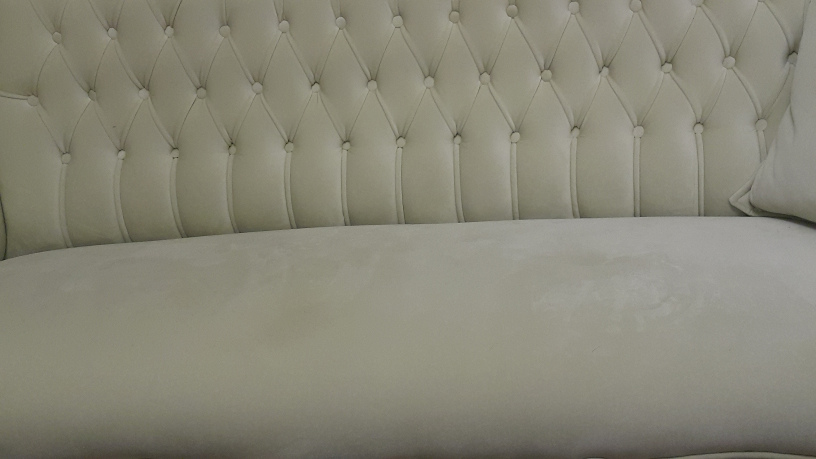

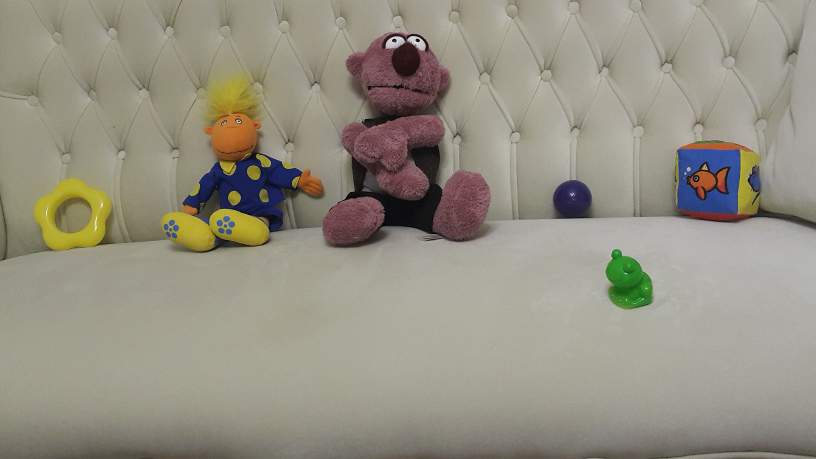

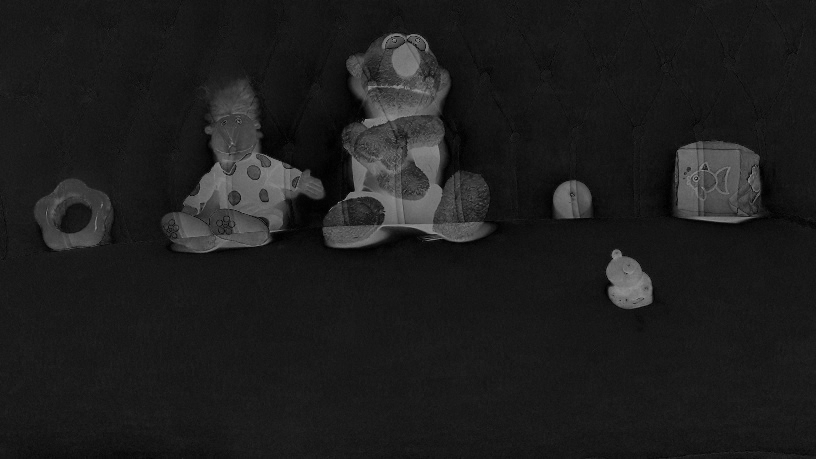

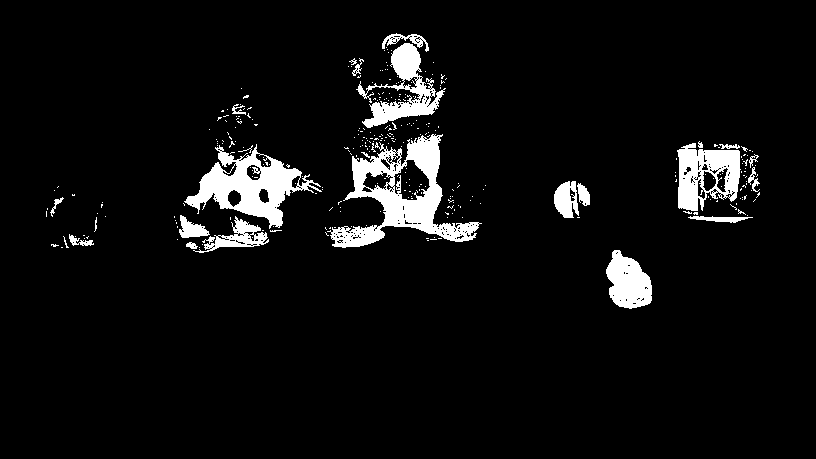

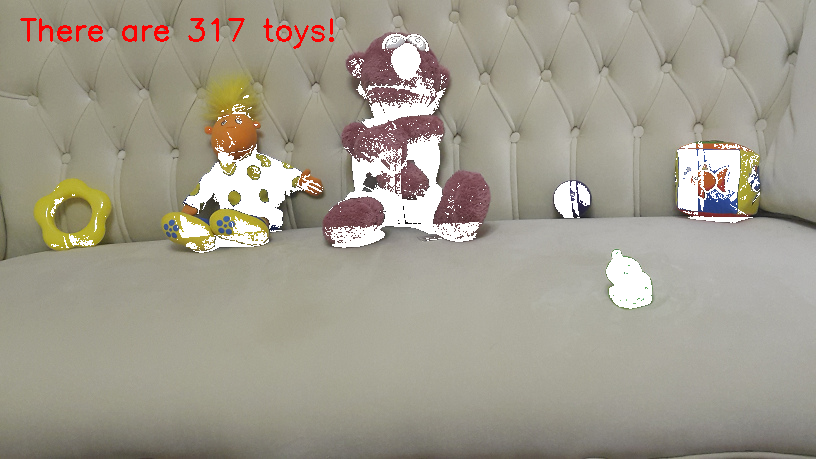

In [ ]:
import numpy as np
import cv2

I1 = cv2.imread('scene1.jpg')
I2 = cv2.imread('scene2.jpg')

cv2_imshow( I1)
# cv2.waitKey(0)

cv2_imshow(  I2)
# cv2.waitKey(0)

K = np.abs(np.int16(I2)-np.int16(I1)) # take the (signed int) differnce
K = K.max(axis=2) # choose the maximum value over color channels
K = np.uint8(K)
cv2_imshow( K)
# cv2.waitKey(0)

threshold = 80
ret, T = cv2.threshold(K,threshold,255,cv2.THRESH_BINARY)
cv2_imshow(  T)
# cv2.waitKey(0)

## opening
# kernel = np.ones((5,5),np.uint8)
# T = cv2.morphologyEx(T, cv2.MORPH_OPEN, kernel)
# cv2.imshow('After Openning', T)
# cv2.waitKey(0)

## closing
# kernel = np.ones((10,10),np.uint8)
# T = cv2.morphologyEx(T, cv2.MORPH_CLOSE, kernel)
# cv2.imshow('After Closing', T)
# cv2.waitKey(0)

n,C = cv2.connectedComponents(T);

J = I2.copy()
J[T != 0] = [255,255,255]
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(J,'There are %d toys!'%(n-1),(20,40), font, 1,(0,0,255),2)
cv2_imshow( J)
# cv2.waitKey()

## connected components with statistics
# n,C,stats, centroids = cv2.connectedComponentsWithStats(T);

# for i in range(n):
#     print("-"*20)
#     print("Connected Component: ", i)
#     print("center= %.2f,%.2f"%(centroids[i][0], centroids[i][1]))
#     print("left= ", stats[i][0])
#     print("top=  ",  stats[i][1])
#     print("width=  ", stats[i][2])
#     print("height= ", stats[i][3])
#     print("area= ", stats[i][4])

# j = n-1 # j: index of largest connected component (change this line)
# J[C == j] = [0,0,255] # Paint largest connected component in RED
# cv2.imshow('Largest Toy in red', J)
# cv2.waitKey()

